___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [5]:
!python --version

Python 3.10.2


In [6]:
#!pip install tensorflow

In [7]:
#!pip install tensorflow==2.0

In [8]:
#!pip install --ignore-installed --upgrade tensorflow==2.6

In [9]:
import tensorflow as tf
tf.__version__

'2.8.0'

# Keras Syntax Basics

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [13]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [14]:
df.head()#regression problemi

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


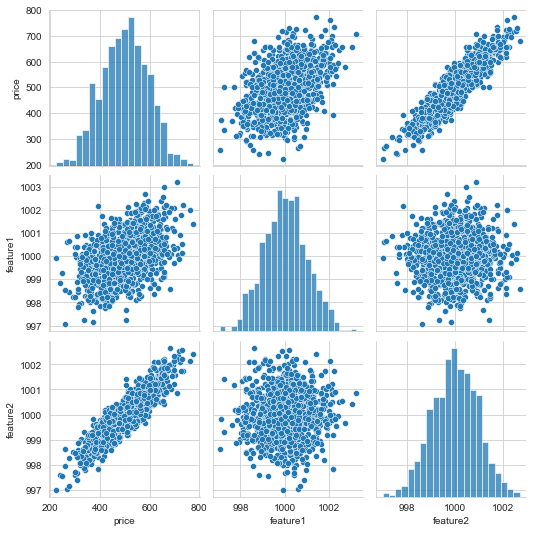

In [17]:
sns.pairplot(df);

In [18]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[['feature1', 'feature2']].values #array olarak data bekliyor data frame olarak istemiyor
y = df['price'].values                  #array olması hzıı arttırır o yüzden value olarak aldım

In [21]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [22]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
X_train.shape

(700, 2)

In [25]:
X_test.shape

(300, 2)

In [26]:
from sklearn.preprocessing import MinMaxScaler #Deep learningte genelde min max scaler kullanılır

In [27]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)   #train setimizdeki değerleri alıp uygulamasını istiyoruz
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train.max()     #tüm değerler 0 ile 1 arasında 

1.0

In [31]:
X_train.min()

0.0

In [32]:
X_test.max()

1.0186515935232023

In [33]:
X_test.min()

-0.014108392024525074

## Modelling

In [39]:
import tensorflow as tf

In [35]:
from tensorflow.keras.models import Sequential  #bize genel iskeletinin kat kat olacağını katmanlardan oluşan bir model 
#bu yüzden sequance olarak tanımlamalııyım
from tensorflow.keras.layers import Dense, Activation  #en anlamlı kullanacağımız katman dense

In [36]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [37]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [40]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),   #liste içinde kaç layer oluşturacaksak herbir dense bir layer temsi
                    Dense(units = 4, activation = "relu"),   #l ediyor 
                    Dense(units = 4, activation = "relu"),   #units parametresi kaç neron olduğunu söylüyor
                    Dense(units = 1)])

In [41]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1]  bu şekilde belirtebiliriz
model.add(Dense(units = 4, activation = "relu"))     #3 hidden var input layer yok 
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [42]:
model.compile(optimizer = "rmsprop", loss = "mse") #binanın içerisinde nasıl çalışacak hangi sistemler ile çalışacağını söyledim

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [43]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250) #şimdi veriyi verip fitleyecem 700 train için 32 batch size 22 olur
#her epochta 22 kere işlem yaptı 32 değerin hatasını aldı gradient disc çalıştırdı dataları güncelledi
#loss değeri ise 22 nin 22 si
#en baştaki hata %500 den rastgele ağırlık değerler başta atanan en sona kadar azalta azalta gitti 

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256672.0156
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256571.0469
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256469.3750
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256358.2812
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 256234.5625
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 256097.8438
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 255944.6875
Epoch 8/250
22/22 [==============================] - 0s 5ms/step - loss: 255775.0000
Epoch 9/250
22/22 [==============================] - 0s 4ms/step - loss: 255587.0781
Epoch 10/250
22/22 [==============================] - 0s 4ms/step - loss: 255379.8438
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255149.1875
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

22/22 [==============================] - 0s 4ms/step - loss: 26196.9551
Epoch 97/250
22/22 [==============================] - 0s 3ms/step - loss: 22720.8281
Epoch 98/250
22/22 [==============================] - 0s 5ms/step - loss: 19461.0273
Epoch 99/250
22/22 [==============================] - 0s 5ms/step - loss: 16468.0859
Epoch 100/250
22/22 [==============================] - 0s 4ms/step - loss: 13718.0225
Epoch 101/250
22/22 [==============================] - 0s 3ms/step - loss: 11233.0713
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 9062.3604
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 7223.3506
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 5709.8901
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 4548.9712
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 3753.0083
Epoch 107/250
22/22 [==============================] - 0s 3ms/step - loss: 3

22/22 [==============================] - 0s 5ms/step - loss: 772.7298
Epoch 193/250
22/22 [==============================] - 0s 4ms/step - loss: 753.6063
Epoch 194/250
22/22 [==============================] - 0s 3ms/step - loss: 731.9507
Epoch 195/250
22/22 [==============================] - 0s 3ms/step - loss: 711.1066
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 691.6432
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 670.9466
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 652.6350
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 632.8321
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 613.4422
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 593.1334
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 574.0537
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 558.2645
Epoch 

In [44]:
model.summary() #57 parametre var 1. ktmanda güncellenmesi gereken kaç parametre var 8+4 12 4x2 = 8 + bias var 12
#4 x 4 16 4 bias var 20 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.weights
#57 tane parametrenin katman katman ne olduğunu görebiliyoruz 

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.9425527 , -0.57393336,  2.0369747 , -0.85722613],
        [ 4.2894907 , -0.1847825 ,  3.7537296 , -0.98958516]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([1.0455585, 0.       , 0.8878536, 0.       ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.01183151,  3.262502  ,  0.31916258,  3.033007  ],
        [ 0.8445737 ,  0.49326736, -0.47777206,  0.03357702],
        [ 0.05532777,  2.0334463 , -0.33849284,  3.1759386 ],
        [ 0.86507183,  0.48555356, -0.24307656, -0.79100484]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([-0.47700298,  1.0160278 , -0.21204697,  1.0153844 ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.4283391 ,  0.08284998, -0.23324805, -0.13029459],
        [-0.37707448, -0.05759931, -0.14

In [46]:
model.history.history  #historiden kastım model eğitilirken oluşan loss değerler sırayla hatanın değişimi 
#yorum yapıcaz 

{'loss': [256672.015625,
  256571.046875,
  256469.375,
  256358.28125,
  256234.5625,
  256097.84375,
  255944.6875,
  255775.0,
  255587.078125,
  255379.84375,
  255149.1875,
  254895.40625,
  254616.84375,
  254313.53125,
  253983.078125,
  253624.78125,
  253236.6875,
  252816.78125,
  252360.921875,
  251871.0,
  251341.734375,
  250777.375,
  250172.5,
  249521.828125,
  248825.234375,
  248084.640625,
  247293.484375,
  246453.25,
  245559.046875,
  244610.078125,
  243606.0625,
  242542.078125,
  241421.984375,
  240238.28125,
  238983.984375,
  237673.421875,
  236287.453125,
  234832.109375,
  233309.875,
  231709.21875,
  230030.21875,
  228275.59375,
  226450.21875,
  224533.078125,
  222541.84375,
  220466.8125,
  218301.59375,
  216052.9375,
  213717.21875,
  211291.953125,
  208774.90625,
  206153.765625,
  203457.28125,
  200662.53125,
  197775.25,
  194782.15625,
  191699.046875,
  188535.59375,
  185273.765625,
  181915.25,
  178461.234375,
  174911.171875,
  171253.

In [47]:
pd.DataFrame(model.history.history) #df e çevirdik görselliyecez 256 binden 24 e düşmüş

,loss
0,256672.016
1,256571.047
2,256469.375
3,256358.281
4,256234.562
...,...
245,60.171
246,55.851
247,51.993
248,48.785


<AxesSubplot:>

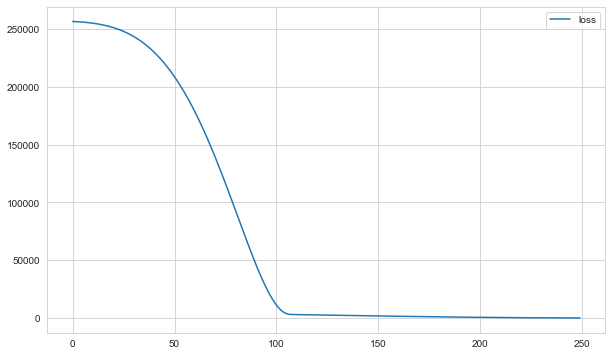

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()               ##plot ladık

(0.0, 3000.0)

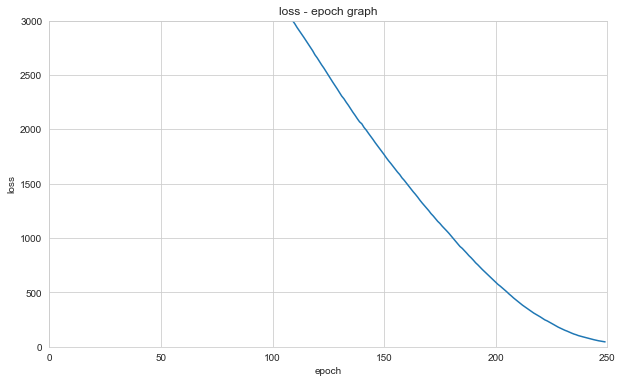

In [49]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values   
#250 epoch lazım değilmiş 200 işimizi görürmüş
#batch size datanın büyüklüğüne göre seçilir süreye göre ayarlanıyor 
#bach size her satırda ağırlıkları güncellenir 

## Model Performance

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score #r2 score

In [52]:
model.evaluate(X_train, y_train, verbose=0) #direk loss değerini verir hem equricy hem ne değeri veröiş isem model 
#evaluate dediğimizde onu verir 

44.93898010253906

In [53]:
model.evaluate(X_test, y_test, verbose=0)

45.051387786865234

In [54]:
y_pred = model.predict(X_test) #

In [55]:
explained_variance_score(y_test, y_pred)#r2 score gayet güzel

0.9954519872922984

In [56]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
261,586.560,577.867
181,499.212,502.733
200,610.580,604.125
25,593.668,608.072
296,502.909,517.179
123,275.333,293.098
275,633.350,633.428
26,531.278,533.196
196,522.359,529.092
125,618.934,613.365


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

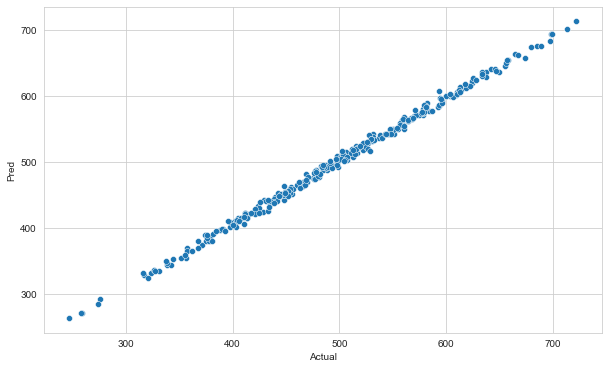

In [57]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [58]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [59]:
eval_metric(y_test, y_pred)

r2_score: 0.9948758836038469 
mae: 5.402070531712894 
mse: 45.05139361223851 
rmse: 6.712033493080805


## Final Model and Model Deployment

In [60]:
scaler = MinMaxScaler().fit(X)

In [61]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [62]:
X_scaled = scaler.transform(X)

In [63]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)
#tüm datayı oluşturup eğitiyoruz 
#eğitilmediyse düşmediyse loss oturup tekrar eğiticaz 

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 257149.3438
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 256846.2969
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 256465.2812
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 255992.1406
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 255400.2500
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 254678.6094
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 253808.5312
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 252771.4688
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 251548.8125
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 250120.9688
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 248483.7969
Epoch 12/250
32/32 [==============================] - 0s 3ms/st

32/32 [==============================] - 0s 2ms/step - loss: 119.8317
Epoch 99/250
32/32 [==============================] - 0s 4ms/step - loss: 107.0155
Epoch 100/250
32/32 [==============================] - 0s 3ms/step - loss: 94.6346
Epoch 101/250
32/32 [==============================] - 0s 3ms/step - loss: 83.8833
Epoch 102/250
32/32 [==============================] - 0s 2ms/step - loss: 73.6000
Epoch 103/250
32/32 [==============================] - 0s 2ms/step - loss: 64.7859
Epoch 104/250
32/32 [==============================] - 0s 2ms/step - loss: 57.9101
Epoch 105/250
32/32 [==============================] - 0s 2ms/step - loss: 51.4064
Epoch 106/250
32/32 [==============================] - 0s 3ms/step - loss: 46.0895
Epoch 107/250
32/32 [==============================] - 0s 3ms/step - loss: 41.2521
Epoch 108/250
32/32 [==============================] - 0s 2ms/step - loss: 37.4643
Epoch 109/250
32/32 [==============================] - 0s 3ms/step - loss: 34.5025
Epoch 110/250
32/

32/32 [==============================] - 0s 3ms/step - loss: 25.0496
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7872
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.9410
Epoch 199/250
32/32 [==============================] - 0s 4ms/step - loss: 24.5373
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6788
Epoch 201/250
32/32 [==============================] - 0s 3ms/step - loss: 24.6552
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 25.1037
Epoch 203/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7574
Epoch 204/250
32/32 [==============================] - 0s 3ms/step - loss: 24.7590
Epoch 205/250
32/32 [==============================] - 0s 2ms/step - loss: 24.9241
Epoch 206/250
32/32 [==============================] - 0s 3ms/step - loss: 25.0898
Epoch 207/250
32/32 [==============================] - 0s 3ms/step - loss: 24.6127
Epoch 208/250
32/3

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [65]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5' modeli h5 uzantısı ile kaydediyorum 
#daha optimum şekilde kaydediyor 

## Prediction-1

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model_fake_reg = load_model('model_fake_reg.h5')

In [68]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb")) #scaler alalım 

In [71]:
sample = [[998, 1000]]  #array olarak veriyorum

In [73]:
sample_scaled = scaler_fake_reg.transform(sample) #scaale ediyorum

In [74]:
model_fake_reg.predict(sample_scaled)

array([[417.8804]], dtype=float32)

## Prediction-2

In [75]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [76]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [77]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [78]:
model_fake_reg.predict(sample_scaled)

array([[377.93185],
       [329.71115],
       [281.4904 ],
       [233.26967],
       [185.05217]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___